<a href="https://colab.research.google.com/github/wilstermanz/holbertonschool-machine_learning/blob/main/pipeline/data_augmentation/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
if tf.__version__ != '2.9.0':
    !pip install tensorflow==2.9.0
    !pip install tensorflow_datasets

In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# 0. Flip

Write a function `def flip_image(image):` that flips an image horizontally:

* `image` is a 3D `tf.Tensor` containing the image to flip
* Returns the flipped image


In [3]:
def flip_image(image):
    return tf.image.flip_left_right(image)

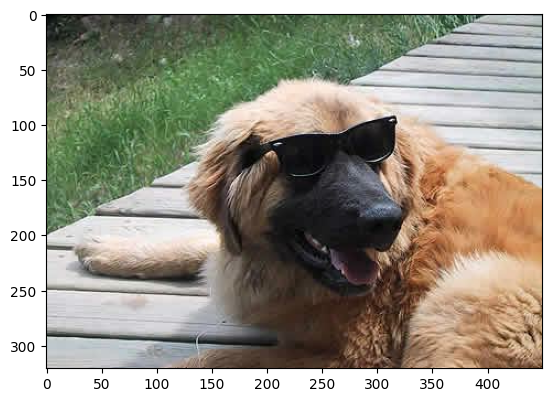

In [11]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(0)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(flip_image(image))
    plt.show()

# 1. Crop

Write a function `def crop_image(image, size):` that performs a random crop of an image:

* `image` is a 3D `tf.Tensor` containing the image to crop
* `size` is a tuple containing the size of the crop
* Returns the cropped image


In [12]:
def crop_image(image, size):
    return tf.image.random_crop(image, size)

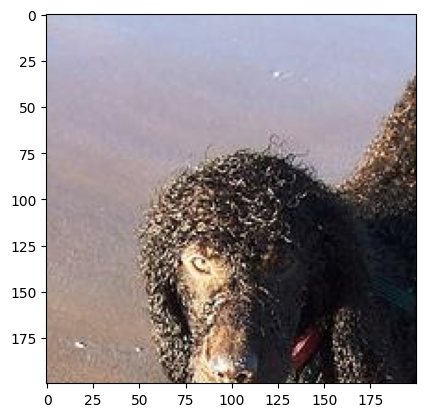

In [13]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(1)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(crop_image(image, (200, 200, 3)))
    plt.show()

# 2. Rotate

Write a function `def rotate_image(image):` that rotates an image by 90 degrees counter-clockwise:

* image is a 3D `tf.Tensor` containing the image to rotate
* Returns the rotated image


In [14]:
def rotate_image(image):
    return tf.image.rot90(image)

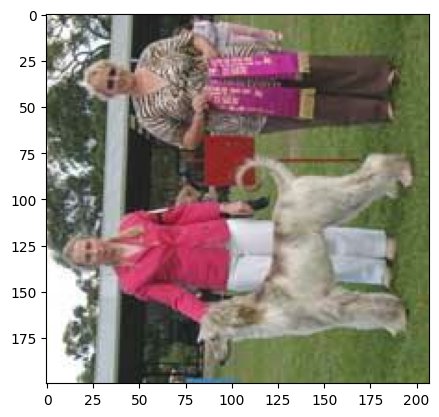

In [15]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(2)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(rotate_image(image))
    plt.show()

# 3. Shear

Write a function `def shear_image(image, intensity):` that randomly shears an image:

* `image` is a 3D `tf.Tensor` containing the image to shear
* intensity is the intensity with which the image should be sheared
* Returns the sheared image


In [30]:
def shear_image(image, intensity):
    sheared = tf.keras.preprocessing.image.random_shear(image.numpy(),
                                                        intensity,
                                                        row_axis=1,
                                                        col_axis=0,
                                                        channel_axis=2
                                                        )
    return tf.convert_to_tensor(sheared)

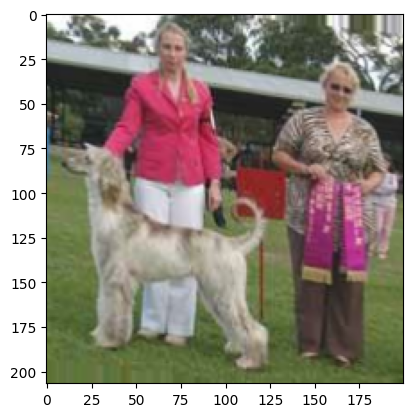

In [42]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(3)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(shear_image(image, 50))
    plt.show()

# 4. Brightness

Write a function `def change_brightness(image, max_delta):` that randomly changes the brightness of an image:

* `image` is a 3D `tf.Tensor` containing the image to change
* `max_delta` is the maximum amount the image should be brightened (or darkened)
* Returns the altered image



In [43]:
def change_brightness(image, max_delta):
    return tf.image.adjust_brightness(image, max_delta)

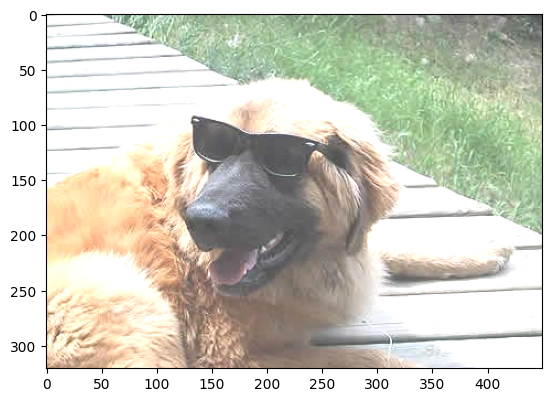

In [44]:
doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(change_brightness(image, 0.3))
    plt.show()

# 5. Hue

Write a function `def change_hue(image, delta):` that changes the hue of an image:

* `image` is a 3D `tf.Tensor` containing the image to change
* `delta` is the amount the hue should change
* Returns the altered image


In [45]:
def change_hue(image, delta):
    return tf.image.adjust_hue(image, delta)

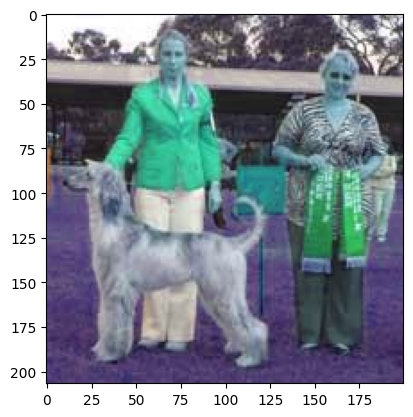

In [48]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(5)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(change_hue(image, -0.5))
    plt.show()